# PSM for ice core d18O

In this tutorial, we introduce the PSM for ice core d18O in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)

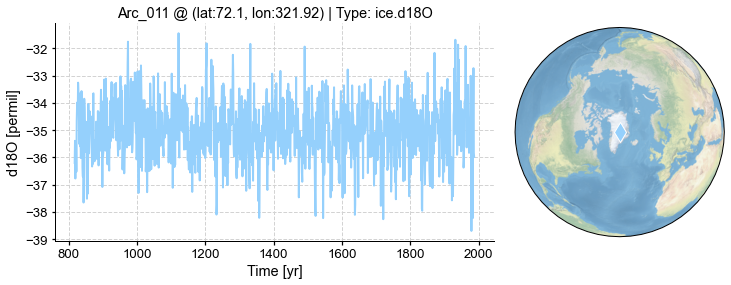

In [3]:
pobj = pdb.records['Arc_011']
fig, ax = pobj.plot()

### Model

In [5]:
%%time

dirpath = './data'

model_tas = cfr.ClimateField().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_pr = cfr.ClimateField().load_nc(os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_psl = cfr.ClimateField().load_nc(os.path.join(dirpath, 'psl_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
model_d18O = cfr.ClimateField().load_nc(os.path.join(dirpath, 'd18O_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

CPU times: user 1.97 s, sys: 22.9 ms, total: 1.99 s
Wall time: 2.02 s


## Get climate data for a specific `ProxyRecord`

In [6]:
%%time

pobj.del_clim()
pobj.get_clim(model_tas, tag='model')
pobj.get_clim(model_pr, tag='model')
pobj.get_clim(model_psl, tag='model')
pobj.get_clim(model_d18O, tag='model')

ProxyRecord.clim deleted for Arc_011.
CPU times: user 128 ms, sys: 534 ms, total: 662 ms
Wall time: 4.07 s


In [7]:
pobj.clim['model_d18O'].da

<xarray.DataArray 'd18O' (time: 13872)>
array([-24.155558, -30.799866, -27.157188, ..., -27.73261 , -28.163136,
       -29.739498], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 72.95
    lon      float32 322.5
Attributes:
    long_name:  Ratio of the total mass precip rate H2O
    units:      permil

## Create a PSM object

In [8]:
mdl = cfr.psm.Ice_d18O(pobj)

In [8]:
%%time
pp = mdl.forward(nproc=1)

100%|███████████████████████████████████| 10602/10602 [00:08<00:00, 1235.28it/s]

CPU times: user 9.08 s, sys: 1.22 s, total: 10.3 s
Wall time: 10.3 s


In [9]:
%%time
pp = mdl.forward()

CPU times: user 2.24 s, sys: 64.3 ms, total: 2.3 s
Wall time: 3.67 s


In [10]:
fig, ax = pp.plot()